In [ ]:
!sudo apt update
!sudo apt install -y software-properties-common
!sudo add-apt-repository -y ppa:deadsnakes/ppa
!sudo apt install -y python3.13  # или python3.13, если доступно

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.13-stdlib
Suggested packages:
  python3.13-venv
The following NEW packages will be installed:
  libpython3.13-stdlib python3.13
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,493 kB of archives.
After this operation, 21.5 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.13-stdlib amd64 3.13.3-1+jammy1 [2,979 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.13 amd64 3.13.3-1+jammy1 [2,513 kB]
Fetched 5,493 kB in 2s (2,274 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Rea

In [ ]:
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3.13

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.7 MB/s eta 0:00:00


In [ ]:
!pip3 install /content/mlgrad-0.7.1-cp313-cp313-linux_x86_64.whl

Processing ./mlgrad-0.7.1-cp313-cp313-linux_x86_64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [mlgrad]


In [203]:
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.models as models
import mlgrad.risks as risks
import mlgrad.gd as gd
import mlgrad.inventory as inventory
from sklearn.metrics import mean_absolute_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [231]:
data = pd.read_csv("/content/starsCYG.csv", sep=',')
data.head()

,id,log.Te,log.light
0,1,4.37,5.23
1,2,4.56,5.74
2,3,4.26,4.93
3,4,4.56,5.74
4,5,4.30,5.19


In [233]:
X = np.log(data['log.Te'].values.astype("d"))
Y = np.log(data['log.light'].values.astype("d"))
Xs = X.reshape(-1,1)

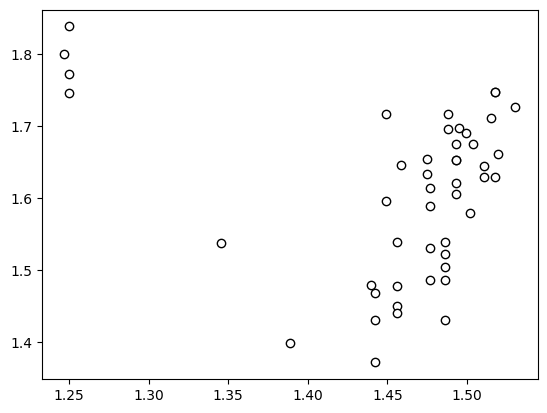

In [234]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.show()

In [235]:
def test_h(h: float):

  mod_ls = models.LinearModel(1)
  regr_ls = regr.regression(X[:,None], Y, mod_ls, h=h)

  plt.scatter(X, Y, c="w", edgecolors="k")

  predict = []
  for x in X:
    predict.append(mod_ls.evaluate([x]))

  print('mae = ', mean_absolute_error(list(Y), predict)*100)

  plt.plot(X, predict)
  plt.show()

mae =  9.63610100125049


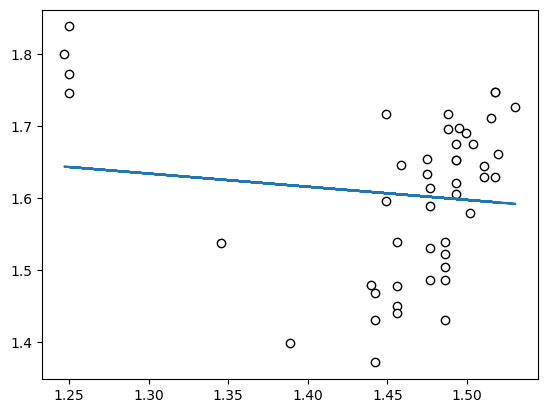

In [236]:
test_h(h=0.1)

mae =  9.649222521510056


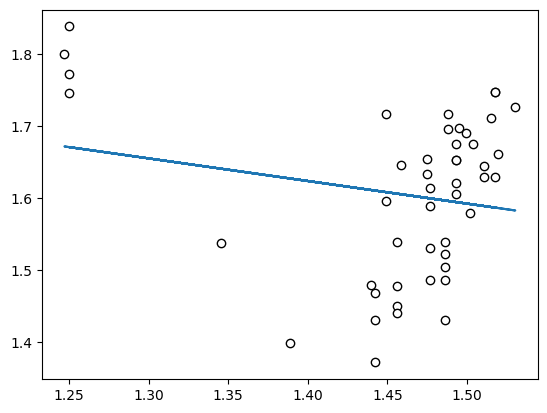

In [237]:
test_h(h=0.5)

mae =  9.649265937504282


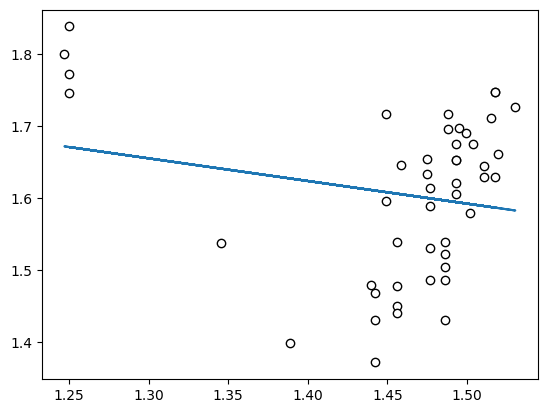

In [238]:
test_h(h=1)

mae =  9.649302512153799


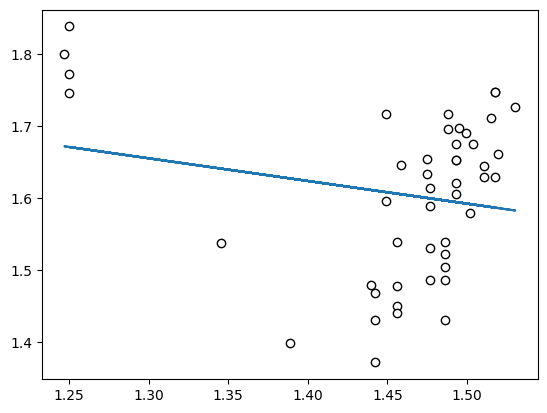

In [239]:
test_h(h=2)

mae =  9.649309482811983


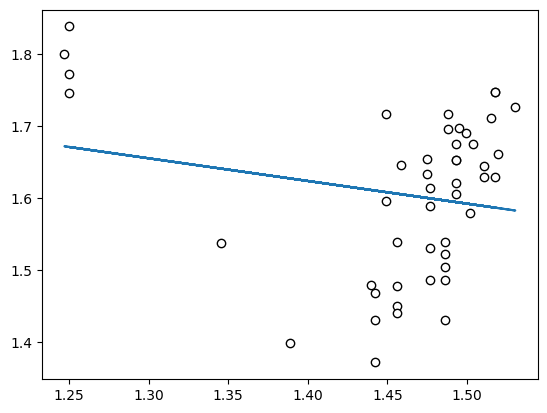

In [240]:
test_h(h=3)

mae =  9.649267072991583


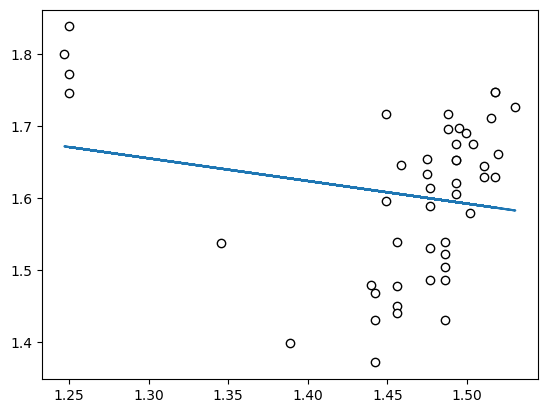

In [241]:
test_h(h=4)

mae =  9.649263335991483


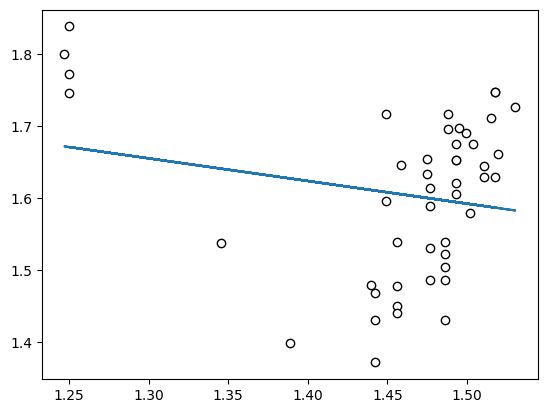

In [242]:
test_h(h=7)

mae =  9.64925487860628


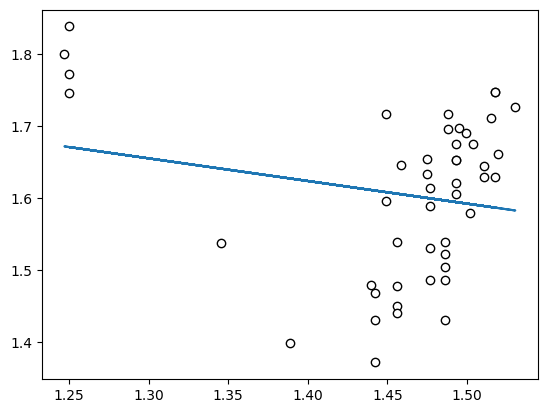

In [244]:
test_h(h=100)

mae =  9.959712361886437


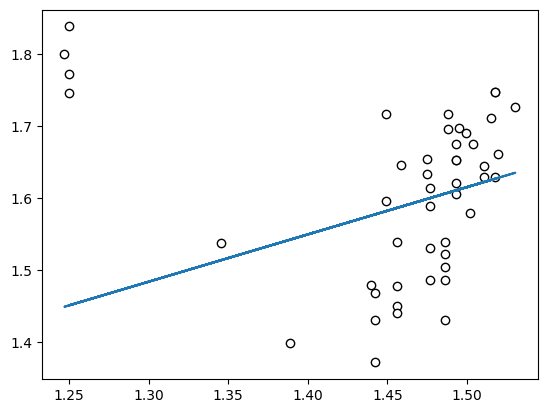

In [247]:
test_h(h=0.001)

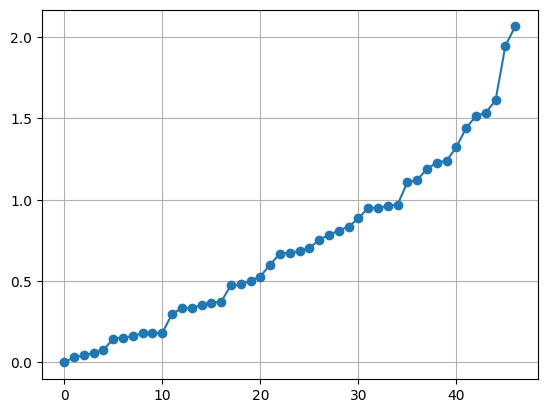

In [248]:
predict = []
for x in X:
  predict.append(mod_ls.evaluate([x]))

E = abs(predict - Y)
Z = inventory.modified_zscore(E)
plt.plot(sorted(abs(Z)), marker='o')
plt.grid(1)
plt.show()

In [254]:
# Уберем выбросы
X1 = X[abs(Z) < 1.5]
Y1 = Y[abs(Z) < 1.5]

In [255]:
mod_ls1 = models.LinearModel(1)
regr_ls1 = regr.regression(X1[:,None], Y1, mod_ls1, h=0.1)
print(np.asarray(mod_ls1.param))

[ 1.914 -0.196]


In [256]:
predict_ls1 = []

for x in X1:
  predict_ls1.append(mod_ls1.evaluate([x]))

<ipython-input-257-6c0e29a2e09f>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


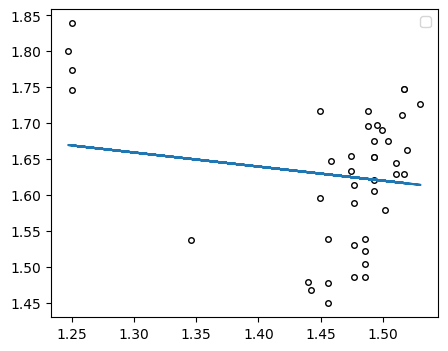

In [257]:
plt.figure(figsize=(5,4))
plt.scatter(X1, Y1, s=16, c='w', edgecolors='k')

plt.plot(X1, predict_ls1)

plt.legend()
plt.show()

In [258]:
print(mean_absolute_error(list(Y1), predict_ls1)*100)

7.94731400668308


Вывод:

*   График, где мы удалили два выброса - идеальный вариант (Mae - минимальна)
*   При h = 0.1, ошибка минимальна

